In [48]:
import pickle as pkl
import os
import numpy as np
import networkx as nx

data_path = '/home/laixin/code/DropEdge/data'
data_file = os.path.join(data_path, 'ind.cora.graph')
data =[]
with open(data_file, 'rb') as f:
    data.append(pkl.load(f, encoding='latin1'))

graph = data[0]
G = nx.from_dict_of_lists(graph)
adj = nx.adjacency_matrix(G)
#print(adj.shape)

degree = np.sum(adj, axis=1)
print(degree)

# index_file = os.path.join(data_path, 'ind.cora.test.index')
# index = []
# for line in open(index_file):
#     index.append(int(line.strip()))
# print(index)



[[3]
 [3]
 [5]
 ...
 [1]
 [4]
 [4]]


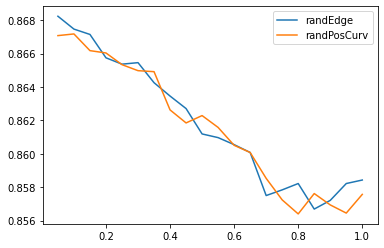

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mean_result(result_file):
    result_arr = np.zeros((20, 100))
    lines = open(result_file).readlines()
    M, N = result_arr.shape
    for i in range(M * N):
        result_arr[i % M][i // M] = float(lines[i].strip().split()[1])
    return np.mean(result_arr, axis=1)

result_file = '/home/laixin/code/DropEdge/inceptiongcn_result_cora_benchmark.txt'
benchmark = mean_result(result_file)
result_file = '/home/laixin/code/DropEdge/inceptiongcn_result_cora_randomPositive.txt'
randPos = mean_result(result_file)

fig, ax = plt.subplots()
x = np.arange(0.05, 1.01, 0.05)
line1, = ax.plot(x, benchmark, label='randEdge')
line2, = ax.plot(x, randPos, label='randPosCurv')
ax.legend()
plt.show()


In [27]:
import sys
sys.path.append("..")
sys.path.append("../src")
import networkx as nx
import torch
import matplotlib.pyplot as plt
import os
from src.utils import load_curv

def SBM_generator(sizes, probs, file_dir=None):
    if not os.path.exists(file_dir):
        G = nx.stochastic_block_model(sizes, probs)
        if not os.path.exists(os.path.dirname(file_dir)):
            os.makedirs(os.path.dirname(file_dir))
        nx.write_gexf(G, file_dir)
    else:
        G = nx.read_gexf(file_dir)
    blocks = nx.get_node_attributes(G, 'block')
    #print(torch.tensor(list(blocks.values())))
    #print(nx.adjacency_matrix(G))
    return G

sizes, probs = [20, 20], [[0.05, 0.005], [0.005, 0.05]]
n_block = len(sizes)
n_node_each_block = sizes[0]
p_intra = probs[0][0]
p_inter = probs[0][1]
sampling_percent = 0.05
file_dir = os.path.join('../SBM_data/', '{:d}_{:d}_{:.2f}_{:.3f}/{:.2f}.gexf'.format(n_block, n_node_each_block, p_intra, p_inter, sampling_percent))
G = SBM_generator(sizes, probs, file_dir)
curv = load_curv(G, True, None)
print(curv)


Computing Ricci curvature...
Ricci curvature loadded.
[((29, 31), -0.3333333335441129), ((6, 7), -2.510107677267115e-10), ((23, 29), -2.510107677267115e-10), ((10, 31), 0.6666666666649763), ((32, 31), 0.6666666666649765), ((6, 14), 0.9999999999957436), ((7, 21), 0.9999999999957438), ((23, 30), 0.9999999999957438), ((13, 17), 1.999999999742793), ((19, 25), 1.999999999742793), ((38, 20), 1.999999999742793), ((22, 24), 1.999999999742793)]


In [28]:
curv = dict(curv)
#x.set_edge_attributes(G, curv, 'rc')
nx.write_gexf(G, file_dir)

In [12]:
a = 0.2345
print('{:.2f}.txt'.format(a))

0.23.txt


In [4]:
import random
pop = [-1,-2,3,4]
weights = [8, -6, -7, 8]
chosen = []
chose_num = 2
for i in range(chose_num):
    a = random.choices(pop, weights=np.exp(weights))
    chosen.append(a)

print(a)

[4]


In [9]:
sampleList = [100, 200, 300, 400, 500]
randomNumberList = np.random.choice(
  sampleList, 3, p=[0.05, 0.1, 0.15, 0.20, 0.5], replace=False)
randomNumberList = np.random.choice(
  sampleList, 3, replace=False)
print(randomNumberList)

[200 300 500]


In [20]:
a = ([2,1], [[1,2],[2,3]])
print(a[1])

[[1, 2], [2, 3]]


In [45]:
result_file = '/home/laixin/code/DropEdge/inceptiongcn_result.txt'
save_file = '/home/laixin/code/DropEdge/result.txt'
def sort_result(result_file):
    lines = open(result_file).readlines()
    result = dict()
    for line in lines:
        key, value = line.strip().split()
        if key not in result.keys():
            result[key] = [value]
        else:
            result[key].append(value)
    for i in np.arange(0.05, 1.01, 0.05):
        key = '%.2f'%i
        with open(save_file, 'a') as f:
            f.write(key + ' ' + ' '.join(result[key]) + '\n')
    
sort_result(result_file)

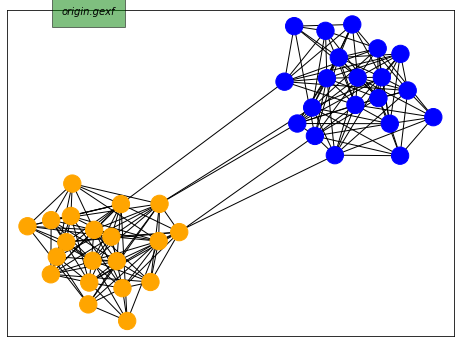

{'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0, '32': 1, '33': 1, '34': 1, '35': 1, '36': 1, '37': 1, '38': 1, '39': 1, '20': 1, '21': 1, '22': 1, '23': 1, '24': 1, '25': 1, '26': 1, '27': 1, '28': 1, '29': 1, '30': 1, '31': 1}


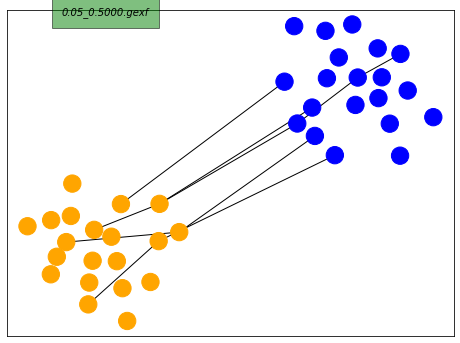

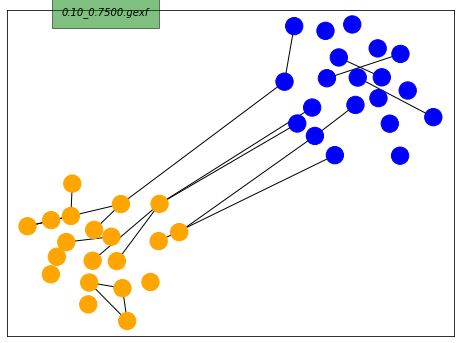

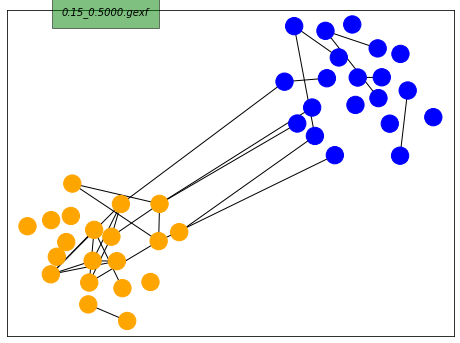

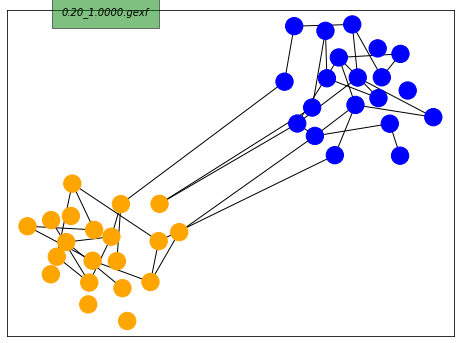

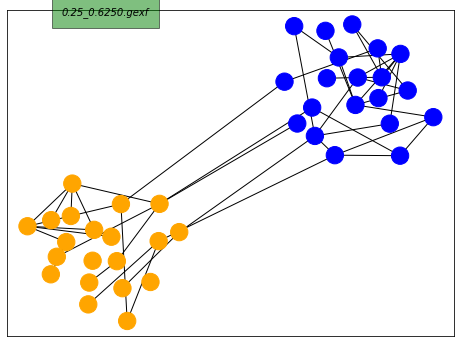

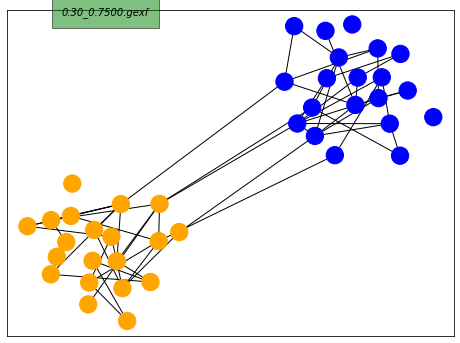

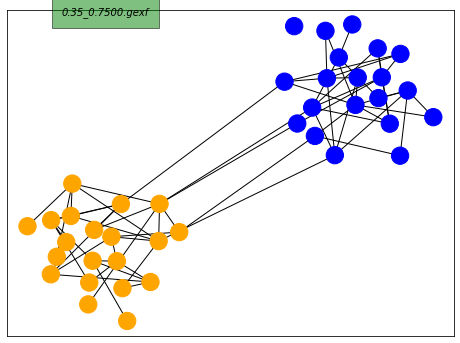

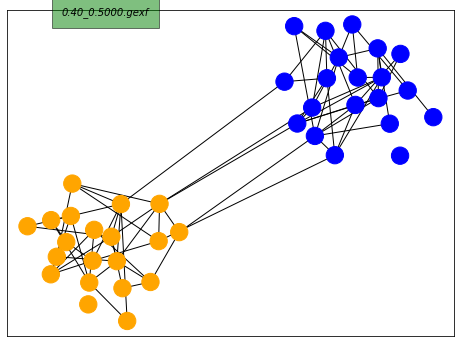

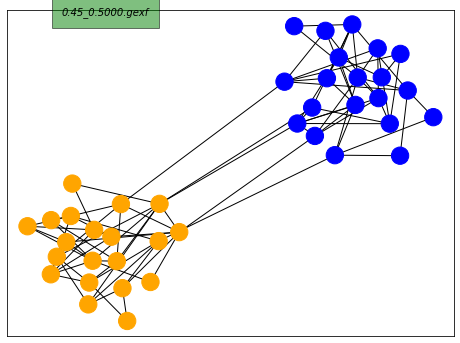

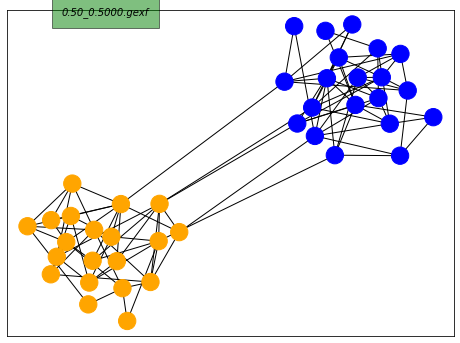

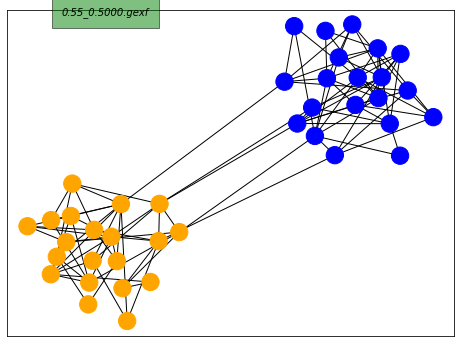

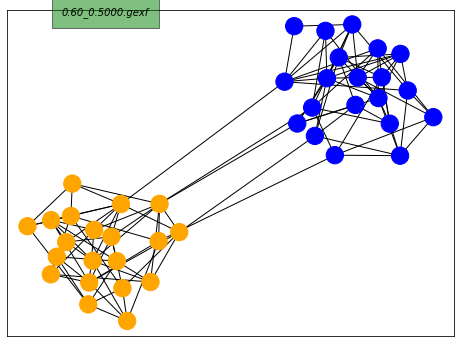

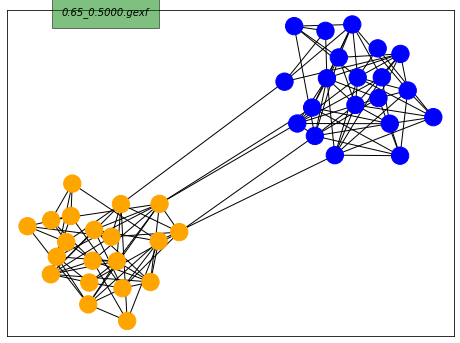

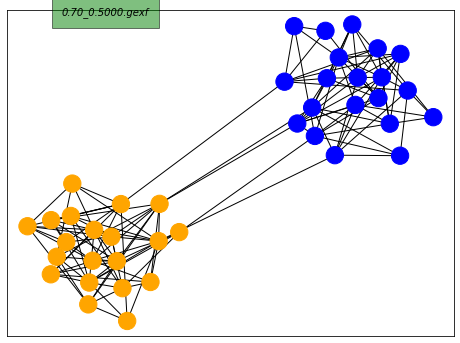

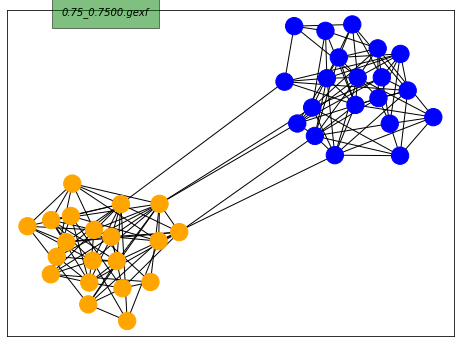

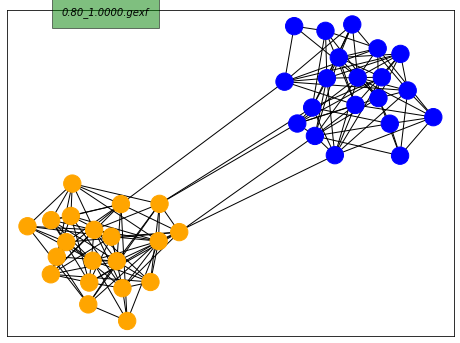

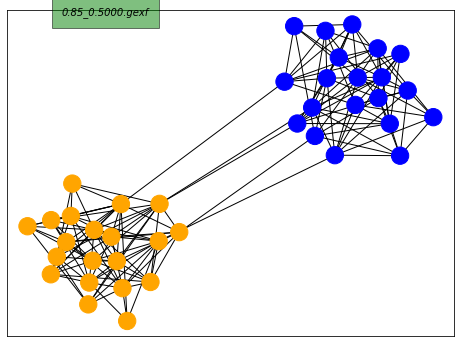

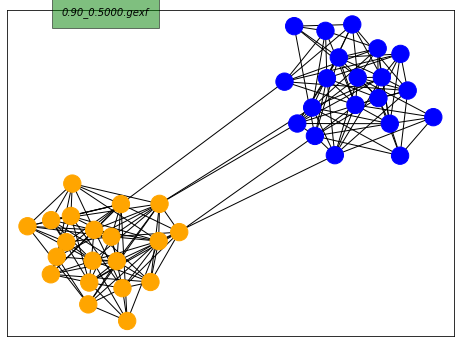

In [82]:
import os
import networkx as nx
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
SEED = 24

def draw_graph(file_dir, pos=None):
    G = nx.read_gexf(file_dir)
    node_color = [colors[node_lable[i]] for i in G.nodes()]

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    flag = 0
    if pos == None:
        flag = 1
        random_state = np.random.RandomState(SEED)
        pos=nx.spring_layout(G , seed=random_state)
    nx.draw_networkx_nodes(G, pos, node_color=node_color, label=nx.get_node_attributes(G, 'block'))
    nx.draw_networkx_edges(G, pos)
    ax.text(-0.8, 0.8, os.path.basename(file_dir), style='italic', bbox={'facecolor':'green', 'alpha': 0.5, 'pad':10})
    plt.show()
    if flag:
        return pos


SBM_save_dir = '/Users/chen_lai/code/DropEdge/SBM_data/2_20_0.50_0.005'
path = Path(SBM_save_dir)
colors = ['blue', 'orange']
random_state = np.random.RandomState(SEED)
pos=nx.spring_layout(G , seed=random_state)
origin_file = os.path.join(SBM_save_dir, 'origin.gexf')
pos = draw_graph(origin_file)
origin_G = nx.read_gexf(origin_file)
node_lable = nx.get_node_attributes(origin_G, 'block')
print(node_lable)

#file_list = os.listdir(SBM_save_dir)
#print(file_list)
for i in np.arange(0.05, 1.01, 0.05):
    for file_dir in path.rglob('%.2f'%i + '_*.gexf'):
        draw_graph(file_dir, pos)
